EIKON 

In [45]:
import refinitiv.dataplatform.eikon as ek
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [12, 8]})

In [1]:
ek.set_app_key('530101f74d64417c846f4ac3d4faef865c4120af')

guide
https://developers.lseg.com/en/video-catalog/data-item-browser

use data item browser in workspace and already set parameters

In [2]:
# calc date is reporting date

df, err = ek.get_data(
    instruments=['TSLA.O'],
    fields=['TR.TotalRevenue.calcdate',
            'TR.TotalRevenue.date', 'TR.TotalRevenue'],
    parameters={
        'Curn': 'USD',
        'SDATE': '2020-12-31',
        'EDATE': '2024-12-31',
        'FRQ': 'FY'
    }
)

display(df)

,Instrument,Calc Date,Date,Total Revenue
0,TSLA.O,2021-01-27,2020-12-31T00:00:00Z,31536000000
1,TSLA.O,2022-01-26,2021-12-31T00:00:00Z,53823000000
2,TSLA.O,2023-01-25,2022-12-31T00:00:00Z,81462000000
3,TSLA.O,2024-01-24,2023-12-31T00:00:00Z,96773000000


In [3]:
df, err = ek.get_data(
    instruments=['TSLA.O'],
    fields=[
        'TR.OPENPRICE',
        'TR.LOWPRICE',
        'TR.HIGHPRICE',
        'TR.CLOSEPRICE',
        'TR.Volume']
)

display(df)

,Instrument,Open Price,Low Price,High Price,Close Price,Volume
0,TSLA.O,220.13,214.38,223.34,217.8,142628874


In [4]:
a = rd.get_history(
    universe='TSLA.O',
    fields=['TR.OPENPRICE',
            'TR.LOWPRICE',
            'TR.HIGHPRICE',
            'TR.CLOSEPRICE',
            'TR.Volume',
            'TR.NetIncome'],
    interval="1D",
    start="2015-01-01",
    end="2019-10-01"
)
print(a)

NameError: name 'rd' is not defined

how was this formula made?
how can I change header?

In [5]:
df, err = ek.get_data(
    instruments=['TSLA.O'],
    fields=[
        'if(TR.NetIncome(Period=FY0)>0,1,0)+if(TR.CashFromOperatingAct(Period=FY0)>0,1,0)+if(TR.ROAActValue(Period=FY0)>TR.ROAActValue(Period=FY-1),1,0)+if(TR.CashFromOperatingAct(Period=FY0)>TR.NetIncomeBeforeExtraItems(Period=FY0),1,0)+if(TR.LTDebtToTotalAssetsPct(Period=FY0)>=TR.LTDebtToTotalAssetsPct(Period=FY-1),1,0)+if(TR.CurrentRatio(Period=FY0)>TR.CurrentRatio(Period=FY-1),1,0)+if(TR.SaleIssuanceOfCommon(Period=FY0)>=0,1,0)+if(TR.GrossProfitMarginIndustrialAndUtilityPct(Period=FY0)>=TR.GrossProfitMarginIndustrialAndUtilityPct(Period=FY-1),1,0)+if(TR.AssetTurnover(Period=FY0)>TR.AssetTurnover(Period=FY-1),1,0)/*Piotroski F-Score*//*Piotroski F-Score*/'
    ]
)

display(df)

,Instrument,"IF(TR.NETINCOME(PERIOD=FY0)>0,1,0)+IF(TR.CASHFROMOPERATINGACT(PERIOD=FY0)>0,1,0)+IF(TR.ROAACTVALUE(PERIOD=FY0)>TR.ROAACTVALUE(PERIOD=FY-1),1,0)+IF(TR.CASHFROMOPERATINGACT(PERIOD=FY0)>TR.NETINCOMEBEFOREEXTRAITEMS(PERIOD=FY0),1,0)+IF(TR.LTDEBTTOTOTALASSETSPCT(PERIOD=FY0)>=TR.LTDEBTTOTOTALASSETSPCT(PERIOD=FY-1),1,0)+IF(TR.CURRENTRATIO(PERIOD=FY0)>TR.CURRENTRATIO(PERIOD=FY-1),1,0)+IF(TR.SALEISSUANCEOFCOMMON(PERIOD=FY0)>=0,1,0)+IF(TR.GROSSPROFITMARGININDUSTRIALANDUTILITYPCT(PERIOD=FY0)>=TR.GROSSPROFITMARGININDUSTRIALANDUTILITYPCT(PERIOD=FY-1),1,0)+IF(TR.ASSETTURNOVER(PERIOD=FY0)>TR.AssetTurnover(Period=FY-1),1,0)/*Piotroski F-Score*//*Piotroski F-Score*/"
0,TSLA.O,4


In [6]:
df, err = ek.get_data(
    instruments=['IWDA.AS'],
    fields=[
        'TR.OPENPRICE(SDate=-200D,EDate=0D).calcdate',
        'TR.OPENPRICE(SDate=-200D,EDate=0D)'
    ]
)

display(df)

,Instrument,Calc Date,Open Price
0,IWDA.AS,2023-12-11,81.0
1,IWDA.AS,2023-12-12,81.255
2,IWDA.AS,2023-12-13,81.425
3,IWDA.AS,2023-12-14,82.165
4,IWDA.AS,2023-12-15,81.695
...,...,...,...
196,IWDA.AS,2024-09-18,94.965
197,IWDA.AS,2024-09-19,95.5
198,IWDA.AS,2024-09-20,95.665
199,IWDA.AS,2024-09-23,95.615


# Return correlations

In [51]:
# calc date is reporting date
df, err = ek.get_data(
    instruments=[
        'LQD',
        'HYG',
        'SPY'
    ],
    fields=[
        'TR.CLOSEPRICE.calcdate',
        'TR.OPENPRICE',
        'TR.LOWPRICE',
        'TR.HIGHPRICE',
        'TR.CLOSEPRICE',
        'TR.Volume'],
    parameters={
        'Curn': 'USD',
        'SDATE': '2000-12-31',
        'EDATE': '2024-12-31',
    }
)

display(df)

,Instrument,Calc Date,Open Price,Low Price,High Price,Close Price,Volume
0,LQD,2001-01-01,<NA>,<NA>,<NA>,<NA>,0
1,LQD,2001-01-02,<NA>,<NA>,<NA>,<NA>,0
2,LQD,2001-01-03,<NA>,<NA>,<NA>,<NA>,0
3,LQD,2001-01-04,<NA>,<NA>,<NA>,<NA>,0
4,LQD,2001-01-05,<NA>,<NA>,<NA>,<NA>,0
...,...,...,...,...,...,...,...
18058,SPY,2024-10-08,570.42,569.5299,573.78,573.17,<NA>
18059,SPY,2024-10-09,573.16,572.55,577.71,577.14,<NA>
18060,SPY,2024-10-10,575.77,574.49,577.58,576.13,<NA>
18061,SPY,2024-10-11,576.05,575.91,580.33,579.58,<NA>


In [52]:
# set the date as index
df = df.set_index("Calc Date")
display(df)

,Instrument,Open Price,Low Price,High Price,Close Price,Volume
Calc Date,,,,,,
2001-01-01,LQD,<NA>,<NA>,<NA>,<NA>,0
2001-01-02,LQD,<NA>,<NA>,<NA>,<NA>,0
2001-01-03,LQD,<NA>,<NA>,<NA>,<NA>,0
2001-01-04,LQD,<NA>,<NA>,<NA>,<NA>,0
2001-01-05,LQD,<NA>,<NA>,<NA>,<NA>,0
...,...,...,...,...,...,...
2024-10-08,SPY,570.42,569.5299,573.78,573.17,<NA>
2024-10-09,SPY,573.16,572.55,577.71,577.14,<NA>
2024-10-10,SPY,575.77,574.49,577.58,576.13,<NA>


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18063 entries, 2001-01-01 to 2024-10-13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Instrument   18063 non-null  string 
 1   Open Price   16044 non-null  Float64
 2   Low Price    16044 non-null  Float64
 3   High Price   16044 non-null  Float64
 4   Close Price  16044 non-null  Float64
 5   Volume       18051 non-null  Int64  
dtypes: Float64(4), Int64(1), string(1)
memory usage: 1.1 MB


In [54]:
# use the pivot function to reshape the data
df_wide = df.pivot(columns="Instrument")
df_wide.head()

Open Price                  Low Price                  High Price  \
Instrument        HYG   LQD        SPY       HYG   LQD        SPY        HYG   
Calc Date                                                                      
2001-01-01       <NA>  <NA>   134.0625      <NA>  <NA>   131.1875       <NA>   
2001-01-02       <NA>  <NA>      132.0      <NA>  <NA>   127.5625       <NA>   
2001-01-03       <NA>  <NA>   128.3125      <NA>  <NA>  127.65625       <NA>   
2001-01-04       <NA>  <NA>   134.9375      <NA>  <NA>      133.0       <NA>   
2001-01-05       <NA>  <NA>  133.46875      <NA>  <NA>   129.1875       <NA>   

                            Close Price                   Volume                
Instrument   LQD        SPY         HYG   LQD         SPY    HYG LQD       SPY  
Calc Date                                                                       
2001-01-01  <NA>  134.28125        <NA>  <NA>    131.1875      0   0         0  
2001-01-02  <NA>  132.15625        <NA>  <NA>    128.8125      0   0   7095200  
2001-01-03  <NA>      136.0        <NA>  <NA>       135.0      0   0  15442600  
2001-01-04  <NA>  135.46875        <NA>  <NA>  133.546875      0   0   7310800  
2001-01-05  <NA>    133.625        <NA>  <NA>    129.1875      0   0  10851100

In [55]:
# Calculate returns for each column in 'Close Price'
returns = df_wide['Close Price'].pct_change()

# Create a MultiIndex for the returns columns
returns.columns = pd.MultiIndex.from_tuples(
    [('Return', col) for col in returns.columns])

# Concatenate the returns DataFrame with the original df_wide
df_wide = pd.concat([df_wide, returns], axis=1)
df_wide.dropna(inplace=True)

# Display the updated DataFrame
df_wide.head()

Open Price                 Low Price                 High Price  \
                  HYG     LQD     SPY       HYG     LQD     SPY        HYG   
Calc Date                                                                    
2007-04-12     104.42  106.43  143.74    104.35  106.34  143.34     104.42   
2007-04-13     104.39  106.56   144.9    104.23  106.26  144.36     104.49   
2007-04-16     104.27  106.59  145.83  104.1458   106.3  145.82     104.27   
2007-04-17     104.15  106.75  146.97    104.14  106.63  146.65      104.4   
2007-04-18     104.19  107.21   146.6    104.15  106.82  146.57     104.27   

                           Close Price                 Volume          \
               LQD     SPY         HYG     LQD     SPY    HYG     LQD   
Calc Date                                                               
2007-04-12  106.59  144.92      104.42  106.48  144.66   6100  101200   
2007-04-13  106.56  145.32      104.23   106.3  145.32   3400  127300   
2007-04-16  106.59  146.86      104.19  106.39   146.7   7600  124200   
2007-04-17  106.98   147.4      104.14  106.97  147.09  28100   92500   
2007-04-18  107.24   147.7      104.17   107.0  147.27   6300  100600   

                         Return                      
                  SPY       HYG       LQD       SPY  
Calc Date                                            
2007-04-12  108445673  0.000671  0.001505  0.004444  
2007-04-13   88354163  -0.00182  -0.00169  0.004562  
2007-04-16  103366536 -0.000384  0.000847  0.009496  
2007-04-17  124129435  -0.00048  0.005452  0.002658  
2007-04-18   77586137  0.000288   0.00028  0.001224

In [56]:
df_wide['Return'].corr()

,HYG,LQD,SPY
HYG,1.000000,0.450373,0.672675
LQD,0.450373,1.000000,0.187884
SPY,0.672675,0.187884,1.000000


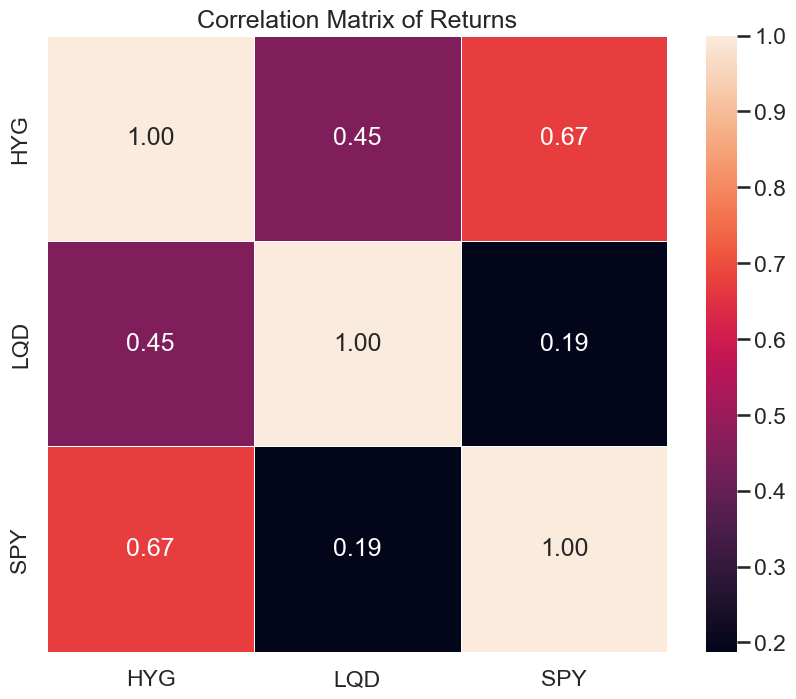

In [57]:
# Calculate the correlation matrix for the return columns
correlation_matrix = df_wide['Return'].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)


# Set the title
plt.title('Correlation Matrix of Returns')

# Show the plot
plt.show()

In [67]:
# calc date is reporting date
df, err = ek.get_data(
    instruments=[
        'DE30YT=RR',
    ],
    fields=[
        'TR.BIDYIELD.calcdate',
        'TR.BIDYIELD',
        'TR.ASKYIELD',
        'TR.MIDYIELD'
    ],
    parameters={
        'Curn': 'EUR',
        'SDATE': '2000-12-31',
        'EDATE': '2024-12-31',
    }
)

display(df)

,Instrument,Calc Date,Bid Yield,Ask Yield,Mid Yield
0,DE30YT=RR,2001-01-01,5.365745,<NA>,5.365745
1,DE30YT=RR,2001-01-02,5.279304,<NA>,5.279304
2,DE30YT=RR,2001-01-03,5.241704,<NA>,5.241704
3,DE30YT=RR,2001-01-04,5.289535,<NA>,5.289535
4,DE30YT=RR,2001-01-05,5.270994,<NA>,5.270994
...,...,...,...,...,...
6201,DE30YT=RR,2024-10-08,2.541,2.536,2.5385
6202,DE30YT=RR,2024-10-09,2.543,2.539,2.541
6203,DE30YT=RR,2024-10-10,2.544,2.539,2.5415
6204,DE30YT=RR,2024-10-11,2.562,2.557,2.5595
